In [27]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix,ROCAUC

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [28]:
# from yellowbrick.classifier import ConfusionMatrix,ROCAUC


def classify_visual(model,X_train, X_test, y_train, y_test,classes,label_encoder):
    """
    classes ：['unoccupied', 'occupied']
    label_encoder : {0: 'unoccupied', 1: 'occupied',}
    """
    
    model.fit(X_train, y_train)
    ra = ROCAUC(model,classes=classes)
    ra.score(X_test, y_test)  # Evaluate the model on the test data
    print("--------- ROC Curves---------")
    ra.poof()
    
    cm = ConfusionMatrix(model,classes=classes,label_encoder=label_encoder,percent =True)
    cm.score(X_test, y_test)
    print("--------- ConfusionMatrix---------")
    cm.poof()
  

def regression_visual(model,X_train, X_test, y_train, y_test):
    
    rp = ResidualsPlot(model)
    rp.fit(X_train, y_train) 
    rp.score(X_test, y_test)
    print("----- residulas plot -----")
    g = rp.poof()
    
    pe = PredictionError(model)
    pe.fit(X_train, y_train) 
    pe.score(X_test, y_test)
    print("----- PredictionError plot -----")
    g = pe.poof()  


In [29]:
# Load the classification data set
data = pd.read_csv('data/occupancy/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].values
y = data.occupancy.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


--------- ROC Curves---------


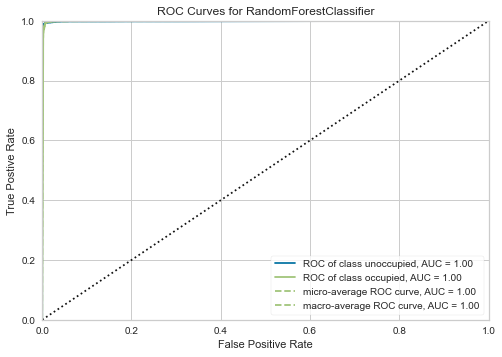

--------- ConfusionMatrix---------


C:\Users\liuxi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


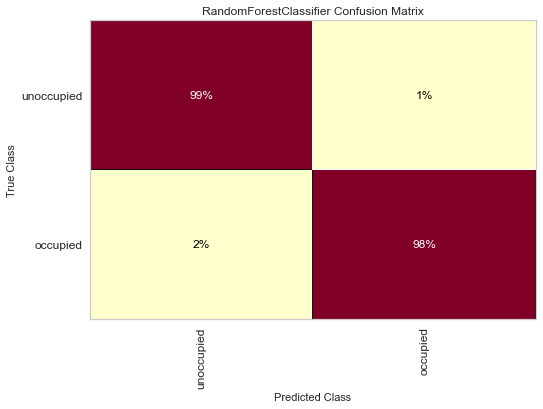

In [30]:

classify_visual(RandomForestClassifier(),X_train, X_test, y_train, y_test,
                classes=['unoccupied', 'occupied'],label_encoder={0: 'unoccupied', 1: 'occupied',})

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
--------- ROC Curves---------


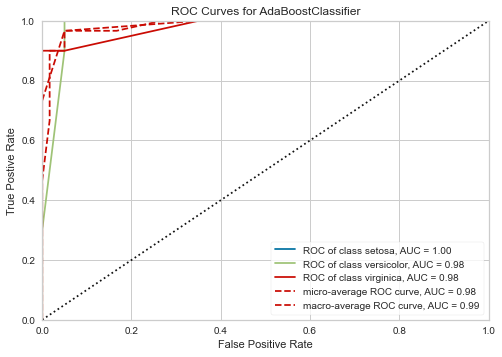

--------- ConfusionMatrix---------


C:\Users\liuxi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


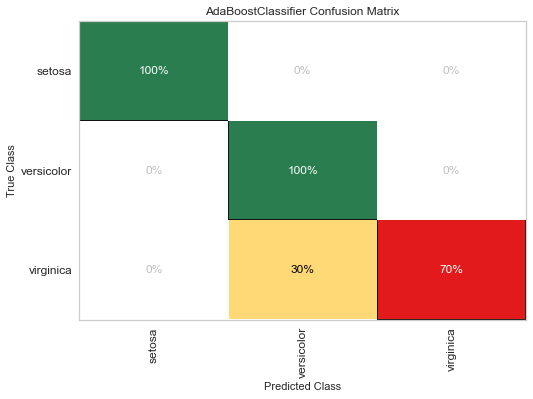

In [31]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from yellowbrick.classifier import ConfusionMatrix

iris = load_iris()
X = iris.data
y = iris.target
classes = iris.target_names
label_encoder={0: 'setosa', 1: 'versicolor', 2: 'virginica'}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(y)
classify_visual(AdaBoostClassifier(),X_train, X_test, y_train, y_test,
                classes=classes,label_encoder=label_encoder)

In [32]:
from sklearn.linear_model import Ridge,Lasso
from yellowbrick.regressor import ResidualsPlot,PredictionError
# Load the data
df = pd.read_csv('data/concrete/concrete.csv')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame
X = df[feature_names].values
y = df[target_name].values

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

----- residulas plot -----


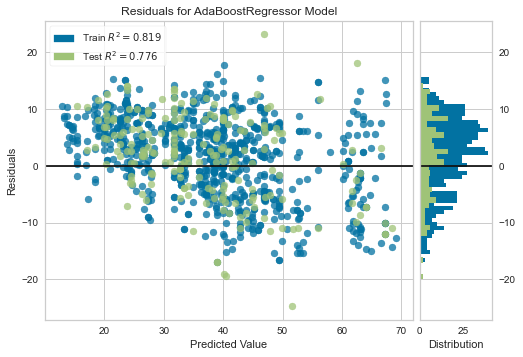

----- PredictionError plot -----


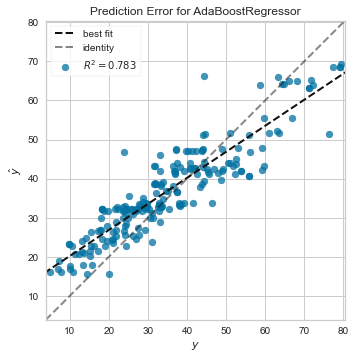

In [26]:

regression_visual(AdaBoostRegressor(),X_train, X_test, y_train, y_test)